In [ ]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import os

In [ ]:
IMAGE_SIZE = [224,224]
folders = glob('/content/drive/My Drive/covid-dataset/train/*')
print(len(folders))

2


In [ ]:
vgg = VGG16(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE+[3])
for i in vgg.layers:
  i.trainable = False

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
predict = Dense(len(folders),activation='softmax')(x)
model = Model(inputs = vgg.inputs,outputs = predict)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   shear_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/covid-dataset/train',
                                                 target_size = (224,224),
                                                 class_mode = 'categorical',
                                                 batch_size = 32)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/covid-dataset/test',
                                            target_size = (224,224),
                                            class_mode = 'categorical',
                                            batch_size = 32)

Found 4277 images belonging to 2 classes.
Found 342 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(training_set,
                        steps_per_epoch = len(training_set),
                        epochs = 2,
                        validation_data = test_set,
                        validation_steps = len(test_set))

Epoch 1/2
134/134 [==============================] - 58s 432ms/step - loss: 0.1739 - accuracy: 0.9394 - val_loss: 0.0954 - val_accuracy: 0.9532
Epoch 2/2
134/134 [==============================] - 58s 435ms/step - loss: 0.1009 - accuracy: 0.9635 - val_loss: 0.1262 - val_accuracy: 0.9474


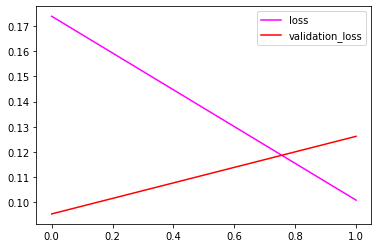

In [ ]:
plt.plot(r.history['loss'],label = 'loss',color = 'magenta')
plt.plot(r.history['val_loss'],label = 'validation_loss',color = 'red')
plt.legend()
plt.show()

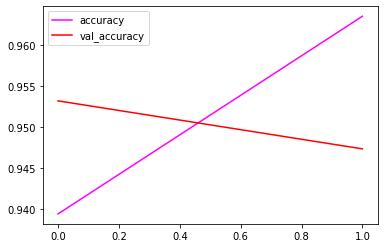

In [ ]:
plt.plot(r.history['accuracy'],label = 'accuracy',color = 'magenta')
plt.plot(r.history['val_accuracy'],label = 'val_accuracy',color = 'red')
plt.legend()
plt.show()

In [ ]:
predict = load_img('/content/drive/My Drive/covid-dataset/validation/IM-0005-0001.jpeg',target_size=(224,224))
x = image.img_to_array(predict)
z = np.expand_dims(x,axis = 0)
result = model.predict(z)
final = np.argmax(result, axis=1)
if final== 1:
  print('NORMAL')
else:
  print('COVID')

COVID


In [ ]:
model.save('covid_vgg1.h5')